<left><a href="https://ubiqum.com/programs/data-analytics-and-machine-learning-program/"><img src = "https://scontent-ber1-1.cdninstagram.com/vp/706a70a2cf2361d0b5c0c9335e9d06d1/5D6D4095/t51.2885-19/s320x320/22352400_125994984820756_7444932873942990848_n.jpg?_nc_ht=scontent-ber1-1.cdninstagram.com" width = 40> </a></left>

<h1 align=center>IoT - Analytics</h1>
<h2 align=center>Deep Analytics, Visualitzation and Modelling</h2>

<h3 align=left><font color = #277a9a>Task 3: <font color = black>Evaluate Techniques for Wifi Locationing</h3>

In the following I will use the machine learning technique to investigate the problem of indoor positioning (with the WAP signal) by using this Data Set: [UJIIndoorLoc Data Set ](http://archive.ics.uci.edu/ml/datasets/UJIIndoorLoc)

<h3 align=left>Data Set Information:</h3><a id='dataset-information'></a>

Many real world applications need to know the localization of a user in the world to provide their services. Therefore, automatic user localization has been a hot research topic in the last years. Automatic user localization consists of estimating the position of the user (latitude, longitude and altitude) by using an electronic device, usually a mobile phone. Outdoor localization problem can be solved very accurately thanks to the inclusion of GPS sensors into the mobile devices. However, indoor localization is still an open problem mainly due to the loss of GPS signal in indoor environments. Although, there are some indoor positioning technologies and methodologies, this database is focused on WLAN fingerprint-based ones (also know as WiFi Fingerprinting). 

Although there are many papers in the literature trying to solve the indoor localization problem using a WLAN fingerprint-based method, there still exists one important drawback in this field which is the lack of a common database for comparison purposes. So, UJIIndoorLoc database is presented to overcome this gap. We expect that the proposed database will become the reference database to compare different indoor localization methodologies based on WiFi fingerprinting. 

The UJIIndoorLoc database covers three buildings of Universitat Jaume I with 4 or more floors and almost 110.000m2. It can be used for classification, e.g. actual building and floor identification, or regression, e.g. actual longitude and latitude estimation. It was created in 2013 by means of more than 20 different users and 25 Android devices. The database consists of 19937 training/reference records (trainingData.csv file) and 1111 validation/test records (validationData.csv file). 

The 529 attributes contain the WiFi fingerprint, the coordinates where it was taken, and other useful information. 

Each WiFi fingerprint can be characterized by the detected Wireless Access Points (WAPs) and the corresponding Received Signal Strength Intensity (RSSI). The intensity values are represented as negative integer values ranging -104dBm (extremely poor signal) to 0dbM. The positive value 100 is used to denote when a WAP was not detected. During the database creation, 520 different WAPs were detected. Thus, the WiFi fingerprint is composed by 520 intensity values. 

Then the coordinates (latitude, longitude, floor) and Building ID are provided as the attributes to be predicted. 

Additional information has been provided. 

The particular space (offices, labs, etc.) and the relative position (inside/outside the space) where the capture was taken have been recorded. Outside means that the capture was taken in front of the door of the space. 

Information about who (user), how (android device & version) and when (timestamp) WiFi capture was taken is also recorded. 

<h3 align=left>Attribute Information:</h3><a id='attribute-information'></a>

- **Attribute 001 - 520 (WAP001 - WAP520):** Intensity value for WAP001 - WAP520. Negative integer values from -104 to 0 and +100. Positive value 100 used if WAP001 - WAP520 was not detected.
- **Attribute 521 (Longitude):** Longitude. Negative real values from -7695.9387549299299000 to -7299.786516730871000 
- **Attribute 522 (Latitude):** Latitude. Positive real values from 4864745.7450159714 to 4865017.3646842018. 
- **Attribute 523 (Floor):** Altitude in floors inside the building. Integer values from 0 to 4. 
- **Attribute 524 (BuildingID):** ID to identify the building. Measures were taken in three different buildings. Categorical integer values from 0 to 2. 
- **Attribute 525 (SpaceID):** Internal ID number to identify the Space (office, corridor, classroom) where the capture was taken. Categorical integer values. 
- **Attribute 526 (RelativePosition):** Relative position with respect to the Space (1 - Inside, 2 - Outside in Front of the door). Categorical integer values. 
- **Attribute 527 (UserID):** User identifier (see below). Categorical integer values. 
- **Attribute 528 (PhoneID):** Android device identifier (see below). Categorical integer values. 
- **Attribute 529 (Timestamp):** UNIX Time when the capture was taken. Integer value. 

### Index:

* [001 - Library import](#library_import)

* [002 - Data loading](#data_loading)

* [003 - Data exploration and cleaning](#data_exploration_and_cleaning)

* [004 - Data categorizing](#data_categorizing)

* [005 - Data exporting](#data_exporting)

### 001 - Library import <a id='library_import'></a>

In [1]:
import numpy as np
print ('Numpy: ', np.__version__)
import pandas as pd
print ('Pandas: ', pd.__version__)

%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.style.use('ggplot')
print ('Matplotlib: ', mpl.__version__)

import plotly as py
import plotly.plotly as pyp
import plotly.graph_objs as go
print ('Plotly: ', py.__version__)

import seaborn as sns
print ('Seaborn: ', sns.__version__)

import sklearn
from sklearn import preprocessing
print ('scikit-learn: ', sklearn.__version__)

Numpy:  1.15.4
Pandas:  0.23.4
Matplotlib:  3.0.2
Plotly:  3.8.1
Seaborn:  0.9.0
scikit-learn:  0.21.0


### 002 - Data loading  <a id='data_loading'></a>

In [2]:
train = pd.read_csv("trainingData.csv")
valid = pd.read_csv("validationData.csv")
print('Data loading into the dataframe!')

Data loading into the dataframe!


### 003 - Data exploration and cleaning <a id='data_exploration_and_cleaning'></a>

In [3]:
print ('dimensions (rows, column)')
print ('train:', train.shape)
print ('valid:', valid.shape)

dimensions (rows, column)
train: (19937, 529)
valid: (1111, 529)


In [4]:
print (train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19937 entries, 0 to 19936
Columns: 529 entries, WAP001 to TIMESTAMP
dtypes: float64(2), int64(527)
memory usage: 80.5 MB
None


In [5]:
train.head()

,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,...,WAP520,LONGITUDE,LATITUDE,FLOOR,BUILDINGID,SPACEID,RELATIVEPOSITION,USERID,PHONEID,TIMESTAMP
0,100,100,100,100,100,100,100,100,100,100,...,100,-7541.2643,4.864921e+06,2,1,106,2,2,23,1371713733
1,100,100,100,100,100,100,100,100,100,100,...,100,-7536.6212,4.864934e+06,2,1,106,2,2,23,1371713691
2,100,100,100,100,100,100,100,-97,100,100,...,100,-7519.1524,4.864950e+06,2,1,103,2,2,23,1371714095
3,100,100,100,100,100,100,100,100,100,100,...,100,-7524.5704,4.864934e+06,2,1,102,2,2,23,1371713807
4,100,100,100,100,100,100,100,100,100,100,...,100,-7632.1436,4.864982e+06,0,0,122,2,11,13,1369909710


In [6]:
train.describe()

,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,...,WAP520,LONGITUDE,LATITUDE,FLOOR,BUILDINGID,SPACEID,RELATIVEPOSITION,USERID,PHONEID,TIMESTAMP
count,19937.000000,19937.000000,19937.0,19937.0,19937.000000,19937.000000,19937.000000,19937.000000,19937.000000,19937.000000,...,19937.0,19937.000000,1.993700e+04,19937.000000,19937.000000,19937.000000,19937.000000,19937.000000,19937.000000,1.993700e+04
mean,99.823644,99.820936,100.0,100.0,99.613733,97.130461,94.733661,93.820234,94.693936,99.163766,...,100.0,-7464.275947,4.864871e+06,1.674575,1.212820,148.429954,1.833024,9.068014,13.021869,1.371421e+09
std,5.866842,5.798156,0.0,0.0,8.615657,22.931890,30.541335,33.010404,30.305084,12.634045,...,0.0,123.402010,6.693318e+01,1.223078,0.833139,58.342106,0.372964,4.988720,5.362410,5.572054e+05
min,-97.000000,-90.000000,100.0,100.0,-97.000000,-98.000000,-99.000000,-98.000000,-98.000000,-99.000000,...,100.0,-7691.338400,4.864746e+06,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.369909e+09
25%,100.000000,100.000000,100.0,100.0,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.0,-7594.737000,4.864821e+06,1.000000,0.000000,110.000000,2.000000,5.000000,8.000000,1.371056e+09
50%,100.000000,100.000000,100.0,100.0,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.0,-7423.060900,4.864852e+06,2.000000,1.000000,129.000000,2.000000,11.000000,13.000000,1.371716e+09
75%,100.000000,100.000000,100.0,100.0,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.0,-7359.193000,4.864930e+06,3.000000,2.000000,207.000000,2.000000,13.000000,14.000000,1.371721e+09
max,100.000000,100.000000,100.0,100.0,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.0,-7300.818990,4.865017e+06,4.000000,2.000000,254.000000,2.000000,18.000000,24.000000,1.371738e+09


In [7]:
# The most common type for Floor and BuildingID
print (train[['FLOOR', 'BUILDINGID']].astype(str).describe(include=['object']))

        FLOOR BUILDINGID
count   19937      19937
unique      5          3
top         3          2
freq     5048       9492


In [8]:
FLOOR_uni = train["FLOOR"].unique()
print('Unique Floors : {}'.format(FLOOR_uni))
BUILDINGID_uni = train["BUILDINGID"].unique()
print('Unique Buildings : {}'.format(BUILDINGID_uni))

Unique Floors : [2 0 3 4 1]
Unique Buildings : [1 0 2]


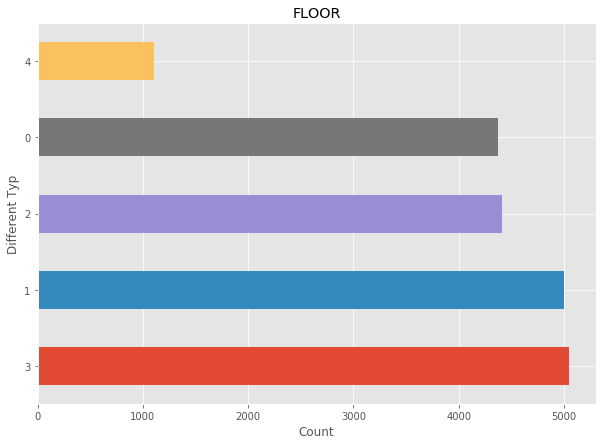

In [9]:
FLOOR_count = train['FLOOR'].value_counts()

FLOOR_count.plot(kind='barh', figsize=(10,7))
plt.title('FLOOR')
plt.ylabel('Different Typ')
plt.xlabel('Count')

plt.show()

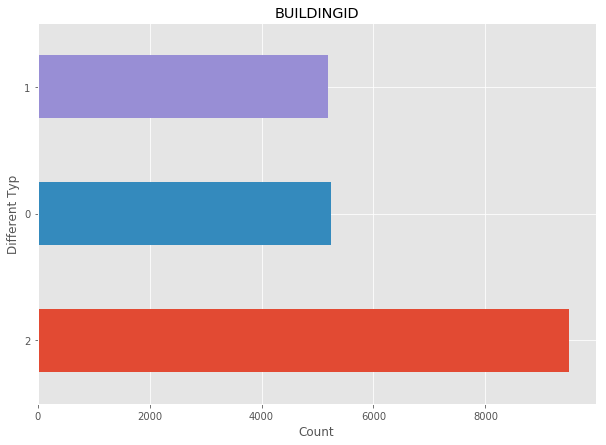

In [10]:
BUILDINGID_count = train['BUILDINGID'].value_counts()

BUILDINGID_count.plot(kind='barh', figsize=(10,7))
plt.title('BUILDINGID')
plt.ylabel('Different Typ')
plt.xlabel('Count')

plt.show()

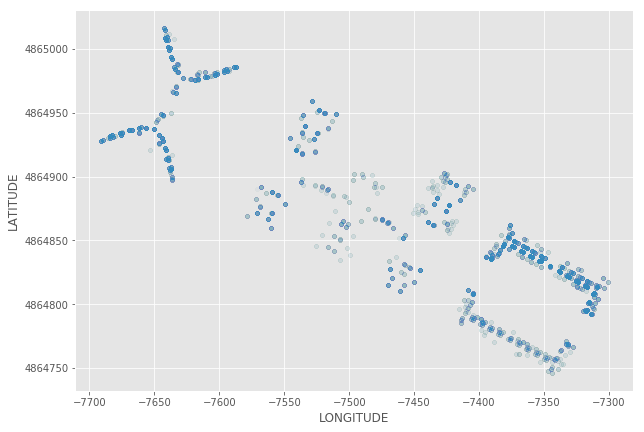

In [11]:
train.plot(kind="scatter", x="LONGITUDE", y="LATITUDE", figsize=(10,7), alpha=0.01)

In [12]:
x = train['LONGITUDE']
y = train['LATITUDE']
z = train['FLOOR']
c = train['USERID']
trace1 = go.Scatter3d(
    x=x,
    y=y,
    z=z,
    mode='markers',
    marker=dict(
        size=2,
        line=dict(
            color=c,
            width=1.5
        ),
        opacity=0.05
    )
)
data = [trace1]
layout = go.Layout(
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0
    )
)
fig = go.Figure(data=data, layout=layout)
pyp.iplot(fig, filename='3d-scatter-plot')

/anaconda3/lib/python3.7/site-packages/IPython/core/display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



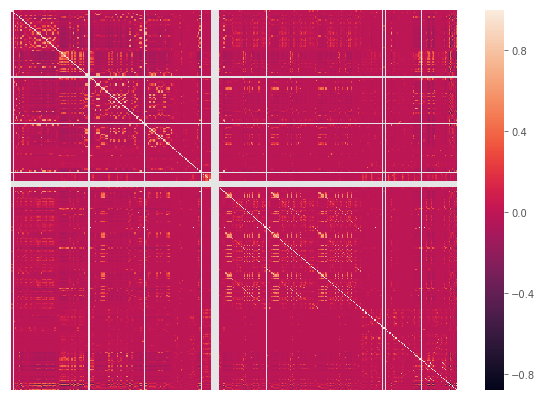

In [13]:
# plot the correlations between the WAP features
corr_matrix = train.corr()
fig = plt.figure(figsize=(10,7))
sns.heatmap(corr_matrix, xticklabels=False, yticklabels=False)

In [14]:
print ('dimensions (rows, column)')
print ('train:', train.shape)

dimensions (rows, column)
train: (19937, 529)


In [15]:
# identification of the WAP columns with only 100 Signal Strengh 
train_column_select = np.sum(train,axis=0)
train_column_select = train_column_select[train_column_select == 1993700]
print ('columns:')
train_column_select.count()

columns:


55

In [16]:
# identification of the rows with only 100 Signal Strengh 
train_row_select = train.iloc[:,:-9]
train_row_select = np.sum(train_row_select, axis=1)
train_row_select = train_row_select[train_row_select == 52000]
print ('rows:')
train_row_select.count()

rows:


76

In [17]:
# remove of the columns
train_clean = train[train.columns[train.sum() != 1993700]]
print ('dimensions (rows, column)')
print ('train:', train_clean.shape)

dimensions (rows, column)
train: (19937, 474)


In [18]:
# remove of the rows
train_row_clean_select = train_clean.iloc[:,:-9]
train_row_clean_select
train_clean['rows'] = np.sum(train_row_clean_select, axis=1)
train_clean
train_clean = train_clean.drop(train_clean.index[train_clean.rows == 46500])
train_clean.drop('rows', axis=1, inplace=True)
print ('dimensions (rows, column)')
print ('train:', train_clean.shape)

dimensions (rows, column)
train: (19861, 474)


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [19]:
# remove the duplicate rows
train_clean = train_clean.drop_duplicates()
print ('dimensions (rows, column)')
print ('train:', train_clean.shape)

dimensions (rows, column)
train: (19227, 474)


In [20]:
# create a column with variance of the WAP's
COLUMN_NAMES=[]
train_var = pd.DataFrame(columns=COLUMN_NAMES)
train_var['variance'] = train_clean.var(axis=0)
print(train_var.head())

          variance
WAP001   35.689745
WAP002   34.858896
WAP005   76.965074
WAP006  544.976254
WAP007  966.157663


In [21]:
# transpose the column with row
train_var_trans = train_var.T
train_var_trans.head()

,WAP001,WAP002,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,WAP011,WAP012,...,WAP519,LONGITUDE,LATITUDE,FLOOR,BUILDINGID,SPACEID,RELATIVEPOSITION,USERID,PHONEID,TIMESTAMP
variance,35.689745,34.858896,76.965074,544.976254,966.157663,1022.715622,951.235653,118.9127,3765.269243,3799.242417,...,5.993759,15447.092072,4569.327615,1.424798,0.705236,3339.763652,0.141773,25.214519,28.780469,3.184262e+11


In [22]:
# set your variance threshold (less than 20 - it give us 1 or 0 as result) and combine it with the main dataset
train_var_trans = train_var_trans.iloc[-1:,:] < 20
train_combine = pd.concat([train_var_trans, train_clean], sort=False)
train_combine.head()

,WAP001,WAP002,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,WAP011,WAP012,...,WAP519,LONGITUDE,LATITUDE,FLOOR,BUILDINGID,SPACEID,RELATIVEPOSITION,USERID,PHONEID,TIMESTAMP
variance,0,0,0,0,0,0,0,0,0,0,...,1,0.0000,0.000000e+00,1,1,0,1,0,0,0
0,100,100,100,100,100,100,100,100,100,100,...,100,-7541.2643,4.864921e+06,2,1,106,2,2,23,1371713733
1,100,100,100,100,100,100,100,100,100,100,...,100,-7536.6212,4.864934e+06,2,1,106,2,2,23,1371713691
2,100,100,100,100,100,-97,100,100,100,100,...,100,-7519.1524,4.864950e+06,2,1,103,2,2,23,1371714095
3,100,100,100,100,100,100,100,100,100,100,...,100,-7524.5704,4.864934e+06,2,1,102,2,2,23,1371713807


In [23]:
# replace all 1 with NaN
train_combine.iloc[:,:-9] = train_combine.replace(to_replace=1, value=np.nan)
train_combine.head()

,WAP001,WAP002,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,WAP011,WAP012,...,WAP519,LONGITUDE,LATITUDE,FLOOR,BUILDINGID,SPACEID,RELATIVEPOSITION,USERID,PHONEID,TIMESTAMP
variance,0,0,0,0,0,0,0,0,0,0,...,NaN,0.0000,0.000000e+00,1,1,0,1,0,0,0
0,100,100,100,100,100,100,100,100,100,100,...,100.0,-7541.2643,4.864921e+06,2,1,106,2,2,23,1371713733
1,100,100,100,100,100,100,100,100,100,100,...,100.0,-7536.6212,4.864934e+06,2,1,106,2,2,23,1371713691
2,100,100,100,100,100,-97,100,100,100,100,...,100.0,-7519.1524,4.864950e+06,2,1,103,2,2,23,1371714095
3,100,100,100,100,100,100,100,100,100,100,...,100.0,-7524.5704,4.864934e+06,2,1,102,2,2,23,1371713807


In [24]:
# remove all column with NaN
train_combine.dropna(axis=1, inplace = True)
train_combine.head()

,WAP001,WAP002,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,WAP011,WAP012,...,WAP518,LONGITUDE,LATITUDE,FLOOR,BUILDINGID,SPACEID,RELATIVEPOSITION,USERID,PHONEID,TIMESTAMP
variance,0,0,0,0,0,0,0,0,0,0,...,0,0.0000,0.000000e+00,1,1,0,1,0,0,0
0,100,100,100,100,100,100,100,100,100,100,...,100,-7541.2643,4.864921e+06,2,1,106,2,2,23,1371713733
1,100,100,100,100,100,100,100,100,100,100,...,100,-7536.6212,4.864934e+06,2,1,106,2,2,23,1371713691
2,100,100,100,100,100,-97,100,100,100,100,...,100,-7519.1524,4.864950e+06,2,1,103,2,2,23,1371714095
3,100,100,100,100,100,100,100,100,100,100,...,100,-7524.5704,4.864934e+06,2,1,102,2,2,23,1371713807


In [25]:
# remove column variance
train_combine = train_combine.drop(train_combine.index[0])
train_combine.head()

,WAP001,WAP002,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,WAP011,WAP012,...,WAP518,LONGITUDE,LATITUDE,FLOOR,BUILDINGID,SPACEID,RELATIVEPOSITION,USERID,PHONEID,TIMESTAMP
0,100,100,100,100,100,100,100,100,100,100,...,100,-7541.2643,4.864921e+06,2,1,106,2,2,23,1371713733
1,100,100,100,100,100,100,100,100,100,100,...,100,-7536.6212,4.864934e+06,2,1,106,2,2,23,1371713691
2,100,100,100,100,100,-97,100,100,100,100,...,100,-7519.1524,4.864950e+06,2,1,103,2,2,23,1371714095
3,100,100,100,100,100,100,100,100,100,100,...,100,-7524.5704,4.864934e+06,2,1,102,2,2,23,1371713807
5,100,100,100,100,100,100,100,100,100,100,...,100,-7533.8962,4.864939e+06,2,1,105,2,2,23,1371713841


In [26]:
train_clean = train_combine

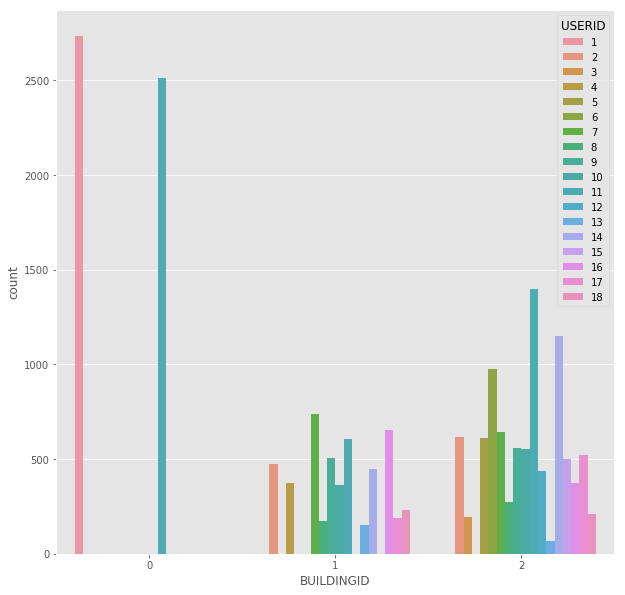

In [27]:
# remove strange UserID's
plt.figure(figsize=(10,10))
sns.countplot(x="BUILDINGID", hue="USERID", data=train_clean,orient="v")

In [28]:
train_clean['TIMESTAMP'] = pd.to_datetime(train_clean['TIMESTAMP'],unit='s')
train_clean.head()

,WAP001,WAP002,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,WAP011,WAP012,...,WAP518,LONGITUDE,LATITUDE,FLOOR,BUILDINGID,SPACEID,RELATIVEPOSITION,USERID,PHONEID,TIMESTAMP
0,100,100,100,100,100,100,100,100,100,100,...,100,-7541.2643,4.864921e+06,2,1,106,2,2,23,2013-06-20 07:35:33
1,100,100,100,100,100,100,100,100,100,100,...,100,-7536.6212,4.864934e+06,2,1,106,2,2,23,2013-06-20 07:34:51
2,100,100,100,100,100,-97,100,100,100,100,...,100,-7519.1524,4.864950e+06,2,1,103,2,2,23,2013-06-20 07:41:35
3,100,100,100,100,100,100,100,100,100,100,...,100,-7524.5704,4.864934e+06,2,1,102,2,2,23,2013-06-20 07:36:47
5,100,100,100,100,100,100,100,100,100,100,...,100,-7533.8962,4.864939e+06,2,1,105,2,2,23,2013-06-20 07:37:21


In [29]:
# Explore with Tableau which User collect Datasamples at the same time in different buildings
# It's User 7, 11, 16
train_clean.drop(train_clean.loc[train_clean.USERID == 7].index, inplace=True)
train_clean.drop(train_clean.loc[train_clean.USERID == 11].index, inplace=True)
train_clean.drop(train_clean.loc[train_clean.USERID == 16].index, inplace=True)
print ('train:', train_clean.shape)
train_clean.head()

train: (12303, 393)


,WAP001,WAP002,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,WAP011,WAP012,...,WAP518,LONGITUDE,LATITUDE,FLOOR,BUILDINGID,SPACEID,RELATIVEPOSITION,USERID,PHONEID,TIMESTAMP
0,100,100,100,100,100,100,100,100,100,100,...,100,-7541.2643,4.864921e+06,2,1,106,2,2,23,2013-06-20 07:35:33
1,100,100,100,100,100,100,100,100,100,100,...,100,-7536.6212,4.864934e+06,2,1,106,2,2,23,2013-06-20 07:34:51
2,100,100,100,100,100,-97,100,100,100,100,...,100,-7519.1524,4.864950e+06,2,1,103,2,2,23,2013-06-20 07:41:35
3,100,100,100,100,100,100,100,100,100,100,...,100,-7524.5704,4.864934e+06,2,1,102,2,2,23,2013-06-20 07:36:47
5,100,100,100,100,100,100,100,100,100,100,...,100,-7533.8962,4.864939e+06,2,1,105,2,2,23,2013-06-20 07:37:21


In [30]:
# remove unnecessary colums
train_clean = train_clean.drop(['SPACEID', 'RELATIVEPOSITION', 'USERID', 'PHONEID', 'TIMESTAMP'], axis=1)
print ('dimensions (rows, column)')
print ('train:', train_clean.shape)

dimensions (rows, column)
train: (12303, 388)


In [31]:
train_clean.head()

,WAP001,WAP002,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,WAP011,WAP012,...,WAP513,WAP514,WAP515,WAP516,WAP517,WAP518,LONGITUDE,LATITUDE,FLOOR,BUILDINGID
0,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,-7541.2643,4.864921e+06,2,1
1,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,-7536.6212,4.864934e+06,2,1
2,100,100,100,100,100,-97,100,100,100,100,...,100,100,100,100,100,100,-7519.1524,4.864950e+06,2,1
3,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,-7524.5704,4.864934e+06,2,1
5,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,-7533.8962,4.864939e+06,2,1


### 004 - Data categorizing <a id='data_categorizing'></a>

In [32]:
train_clean["BUILDINGID"].replace([1], "A", inplace=True)
train_clean["BUILDINGID"].replace([2], "B", inplace=True)
train_clean["BUILDINGID"].replace([3], "C", inplace=True)
train_clean.head()

,WAP001,WAP002,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,WAP011,WAP012,...,WAP513,WAP514,WAP515,WAP516,WAP517,WAP518,LONGITUDE,LATITUDE,FLOOR,BUILDINGID
0,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,-7541.2643,4.864921e+06,2,A
1,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,-7536.6212,4.864934e+06,2,A
2,100,100,100,100,100,-97,100,100,100,100,...,100,100,100,100,100,100,-7519.1524,4.864950e+06,2,A
3,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,-7524.5704,4.864934e+06,2,A
5,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,-7533.8962,4.864939e+06,2,A


In [33]:
train_clean['BUILDINGID_FLOOR']=train_clean['BUILDINGID'].astype(str)+''+train_clean['FLOOR'].astype(str)
train_clean.head()

,WAP001,WAP002,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,WAP011,WAP012,...,WAP514,WAP515,WAP516,WAP517,WAP518,LONGITUDE,LATITUDE,FLOOR,BUILDINGID,BUILDINGID_FLOOR
0,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,-7541.2643,4.864921e+06,2,A,A2
1,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,-7536.6212,4.864934e+06,2,A,A2
2,100,100,100,100,100,-97,100,100,100,100,...,100,100,100,100,100,-7519.1524,4.864950e+06,2,A,A2
3,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,-7524.5704,4.864934e+06,2,A,A2
5,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,-7533.8962,4.864939e+06,2,A,A2


In [36]:
# Create a label (category) encoder object
le = preprocessing.LabelEncoder()
print (le)
print ()
# Fit the encoder to the pandas column
le.fit(train_clean['BUILDINGID_FLOOR'])
# View the labels (if you want)
print (list(le.classes_))
print ()
# Apply the fitted encoder to the pandas column
le.transform(train_clean['BUILDINGID_FLOOR'])
# Convert some integers into their category names
print (list(le.inverse_transform([2, 2, 1, 0])))

LabelEncoder()

['00', '01', '02', '03', 'A0', 'A1', 'A2', 'A3', 'B0', 'B1', 'B2', 'B3', 'B4']

['02', '02', '01', '00']


In [37]:
train_clean.head()

,WAP001,WAP002,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,WAP011,WAP012,...,WAP514,WAP515,WAP516,WAP517,WAP518,LONGITUDE,LATITUDE,FLOOR,BUILDINGID,BUILDINGID_FLOOR
0,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,-7541.2643,4.864921e+06,2,A,A2
1,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,-7536.6212,4.864934e+06,2,A,A2
2,100,100,100,100,100,-97,100,100,100,100,...,100,100,100,100,100,-7519.1524,4.864950e+06,2,A,A2
3,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,-7524.5704,4.864934e+06,2,A,A2
5,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,-7533.8962,4.864939e+06,2,A,A2


### 005 - Data exporting <a id='data_exporting'></a>

In [48]:
train_clean.to_csv('trainingData_clean.csv')
print('Data exporting into the CSV file!')
train_clean.head()

Data exporting into the CSV file!


,WAP001,WAP002,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,WAP011,WAP012,...,WAP514,WAP515,WAP516,WAP517,WAP518,LONGITUDE,LATITUDE,FLOOR,BUILDINGID,BUILDINGID_FLOOR
0,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,-7541.2643,4.864921e+06,2,A,A2
1,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,-7536.6212,4.864934e+06,2,A,A2
2,100,100,100,100,100,-97,100,100,100,100,...,100,100,100,100,100,-7519.1524,4.864950e+06,2,A,A2
3,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,-7524.5704,4.864934e+06,2,A,A2
5,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,-7533.8962,4.864939e+06,2,A,A2


# Multiple Linear Regression

### select some features that we want to use for regression

In [54]:
cdf = train_clean[['LONGITUDE','LATITUDE','FLOOR']]
cdf.head(9)

,LONGITUDE,LATITUDE,FLOOR
0,-7541.264300,4.864921e+06,2
1,-7536.621200,4.864934e+06,2
2,-7519.152400,4.864950e+06,2
3,-7524.570400,4.864934e+06,2
5,-7533.896200,4.864939e+06,2
6,-7519.152400,4.864950e+06,2
7,-7527.451100,4.864929e+06,2
8,-7559.497300,4.864888e+06,2
9,-7510.437173,4.864949e+06,2


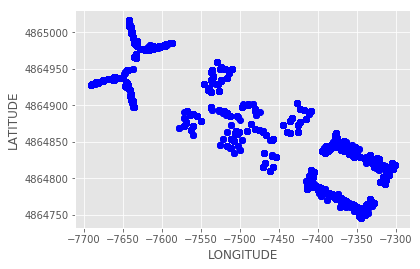

In [55]:
plt.scatter(cdf.LONGITUDE, cdf.LATITUDE,  color='blue')
plt.xlabel("LONGITUDE")
plt.ylabel("LATITUDE")
plt.show()

### Creating train and test dataset

In [56]:
msk = np.random.rand(len(train_clean)) < 0.8
train = cdf[msk]
test = cdf[~msk]

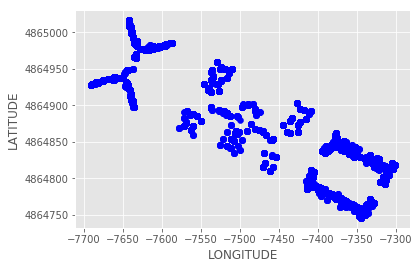

In [57]:
plt.scatter(train.LONGITUDE, train.LATITUDE,  color='blue')
plt.xlabel("LONGITUDE")
plt.ylabel("LATITUDE")
plt.show()

In [59]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
x = np.asanyarray(train[['LONGITUDE','LATITUDE']])
y = np.asanyarray(train[['FLOOR']])
regr.fit (x, y)
# The coefficients
print ('Coefficients: ', regr.coef_)

Coefficients:  [[-0.00136603 -0.00343052]]


In [61]:
y_hat= regr.predict(test[['LONGITUDE','LATITUDE']])
x = np.asanyarray(test[['LONGITUDE','LATITUDE']])
y = np.asanyarray(test[['FLOOR']])
print("Residual sum of squares: %.2f"
      % np.mean((y_hat - y) ** 2))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(x, y))

Residual sum of squares: 1.51
Variance score: 0.01
